<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Load-the-segmentation-data" data-toc-modified-id="Load-the-segmentation-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load the segmentation data</a></span></li><li><span><a href="#Data-Manipulation" data-toc-modified-id="Data-Manipulation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Manipulation</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Machine-Learning" data-toc-modified-id="Machine-Learning-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Machine Learning</a></span><ul class="toc-item"><li><span><a href="#Scaling" data-toc-modified-id="Scaling-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Scaling</a></span></li><li><span><a href="#Hierarchical-Clustering" data-toc-modified-id="Hierarchical-Clustering-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Hierarchical Clustering</a></span></li><li><span><a href="#KMeans-Clustering" data-toc-modified-id="KMeans-Clustering-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>KMeans Clustering</a></span><ul class="toc-item"><li><span><a href="#Find-number-of-cluster-using-elbow-method" data-toc-modified-id="Find-number-of-cluster-using-elbow-method-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Find number of cluster using elbow method</a></span></li><li><span><a href="#After-finding-number-of-clusters-fit-the-method" data-toc-modified-id="After-finding-number-of-clusters-fit-the-method-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>After finding number of clusters fit the method</a></span></li><li><span><a href="#Analysis-of-Clusters" data-toc-modified-id="Analysis-of-Clusters-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>Analysis of Clusters</a></span></li></ul></li><li><span><a href="#Dimension-Reduction-using-PCA" data-toc-modified-id="Dimension-Reduction-using-PCA-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Dimension Reduction using PCA</a></span></li><li><span><a href="#KMeans-Clustering-using-PCA" data-toc-modified-id="KMeans-Clustering-using-PCA-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>KMeans Clustering using PCA</a></span><ul class="toc-item"><li><span><a href="#K-means-clustering-with-PCA-Results" data-toc-modified-id="K-means-clustering-with-PCA-Results-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>K-means clustering with PCA Results</a></span></li></ul></li></ul></li><li><span><a href="#Pickle-the-Models" data-toc-modified-id="Pickle-the-Models-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Pickle the Models</a></span></li></ul></div>

# Description
Course: [Customer Analytics in Python by 365datascience.com](https://365datascience.teachable.com/courses/enrolled/709679)


**Data**
- segmentation data.csv
- purchase data

Segmentation data  
- 2k individuals
- purchasing behaviors of FMCG store collected using loyalty card.
- data was already preprocessed and nans are removed.

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
# my personal library
from bhishan import bp

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.plotting.register_matplotlib_converters()

from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot') 

# random state
SEED=100
# np.random.seed(SEED)

[(x.__name__,x.__version__) for x in [np,pd,sns]]

[('numpy', '1.18.1'), ('pandas', '1.0.1'), ('seaborn', '0.9.0')]

# Load the segmentation data

In [5]:
dfs = pd.read_csv('../data/segmentation data.csv',index_col=0)
print(dfs.shape)

dfs.head().append(dfs.tail())

(2000, 7)


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0
100001999,1,1,24,1,97968,0,0


# Data Manipulation

In [6]:
dfs.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

# EDA

In [7]:
dfs.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


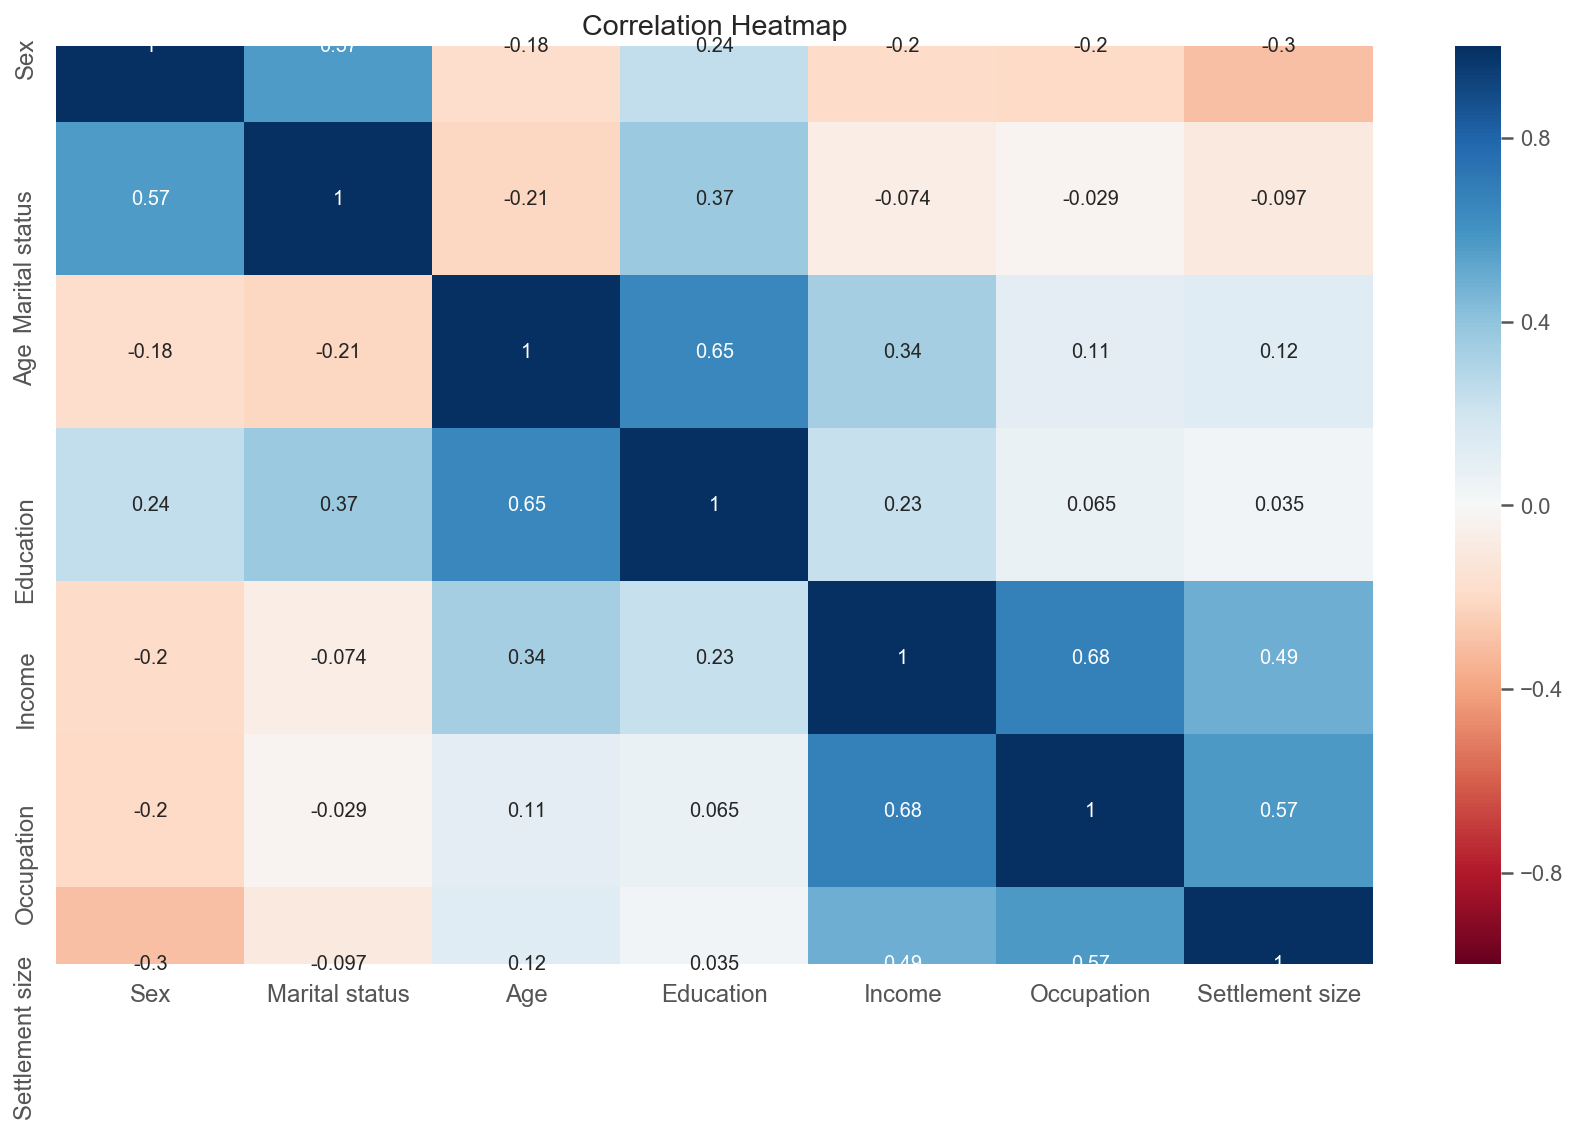

In [8]:
bp.plot_corr(dfs)

In [9]:
bp.plot_corr_style(dfs)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.00,0.57,-0.18,0.24,-0.20,-0.20,-0.30
Marital status,0.57,1.00,-0.21,0.37,-0.07,-0.03,-0.10
Age,-0.18,-0.21,1.00,0.65,0.34,0.11,0.12
Education,0.24,0.37,0.65,1.00,0.23,0.06,0.03
Income,-0.20,-0.07,0.34,0.23,1.00,0.68,0.49
Occupation,-0.20,-0.03,0.11,0.06,0.68,1.00,0.57
Settlement size,-0.30,-0.10,0.12,0.03,0.49,0.57,1.00


In [10]:
dfs.head(2)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2


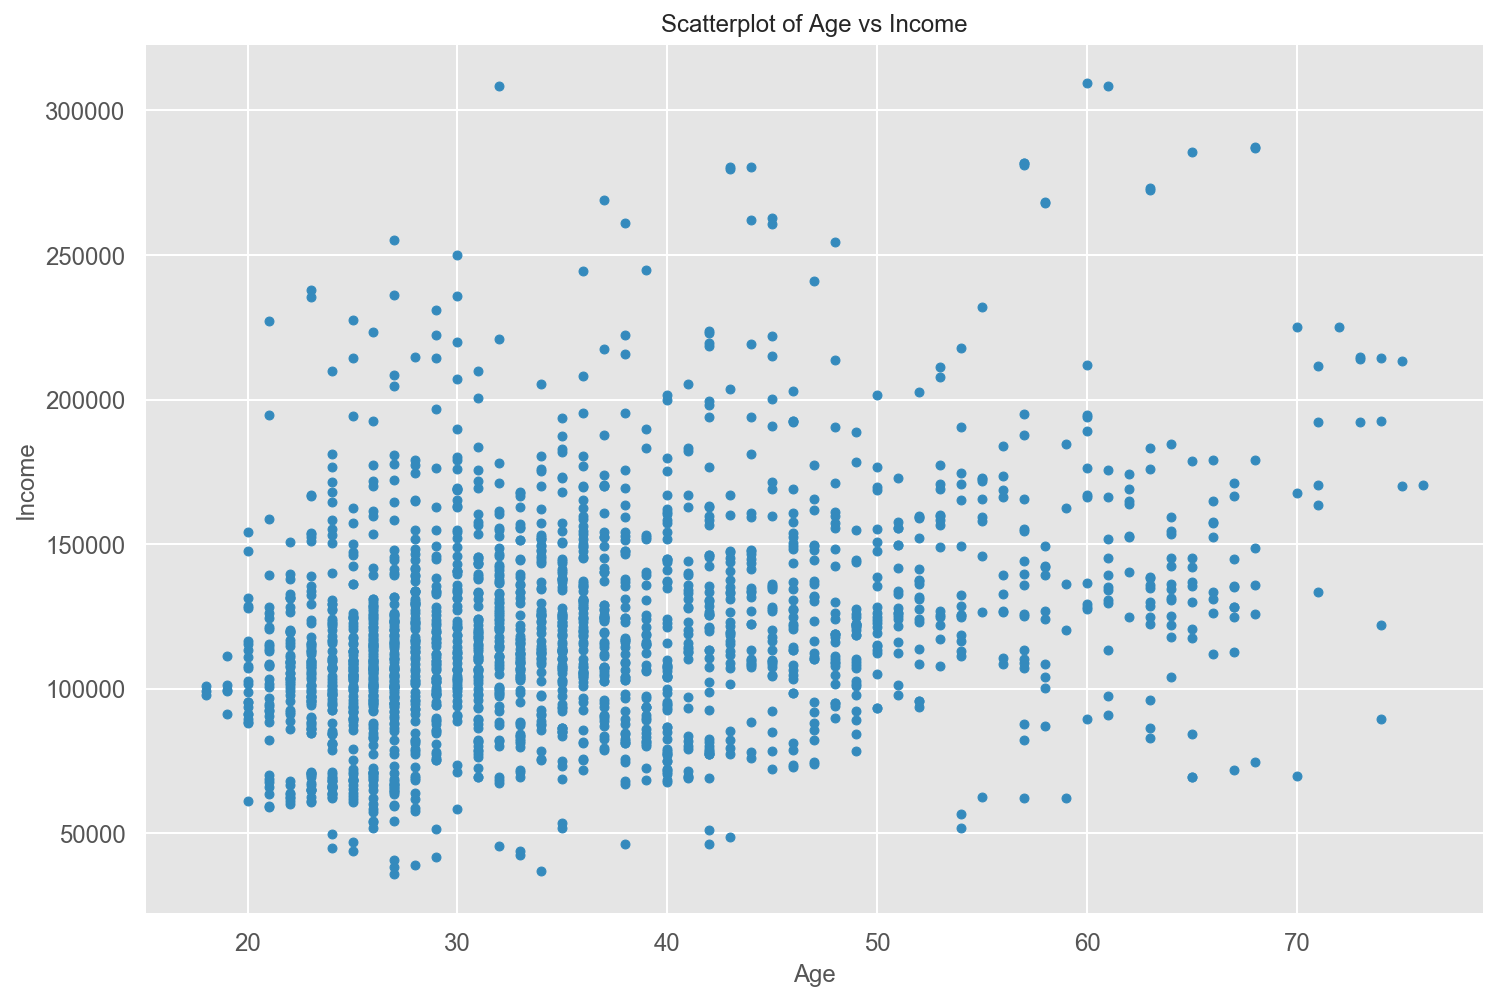

In [11]:
bp.plot_num_num(dfs,'Age','Income')

# Machine Learning

## Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
dfs_std = scaler.fit_transform(dfs)

## Hierarchical Clustering

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [16]:
hier_clust = linkage(dfs_std,method='ward')

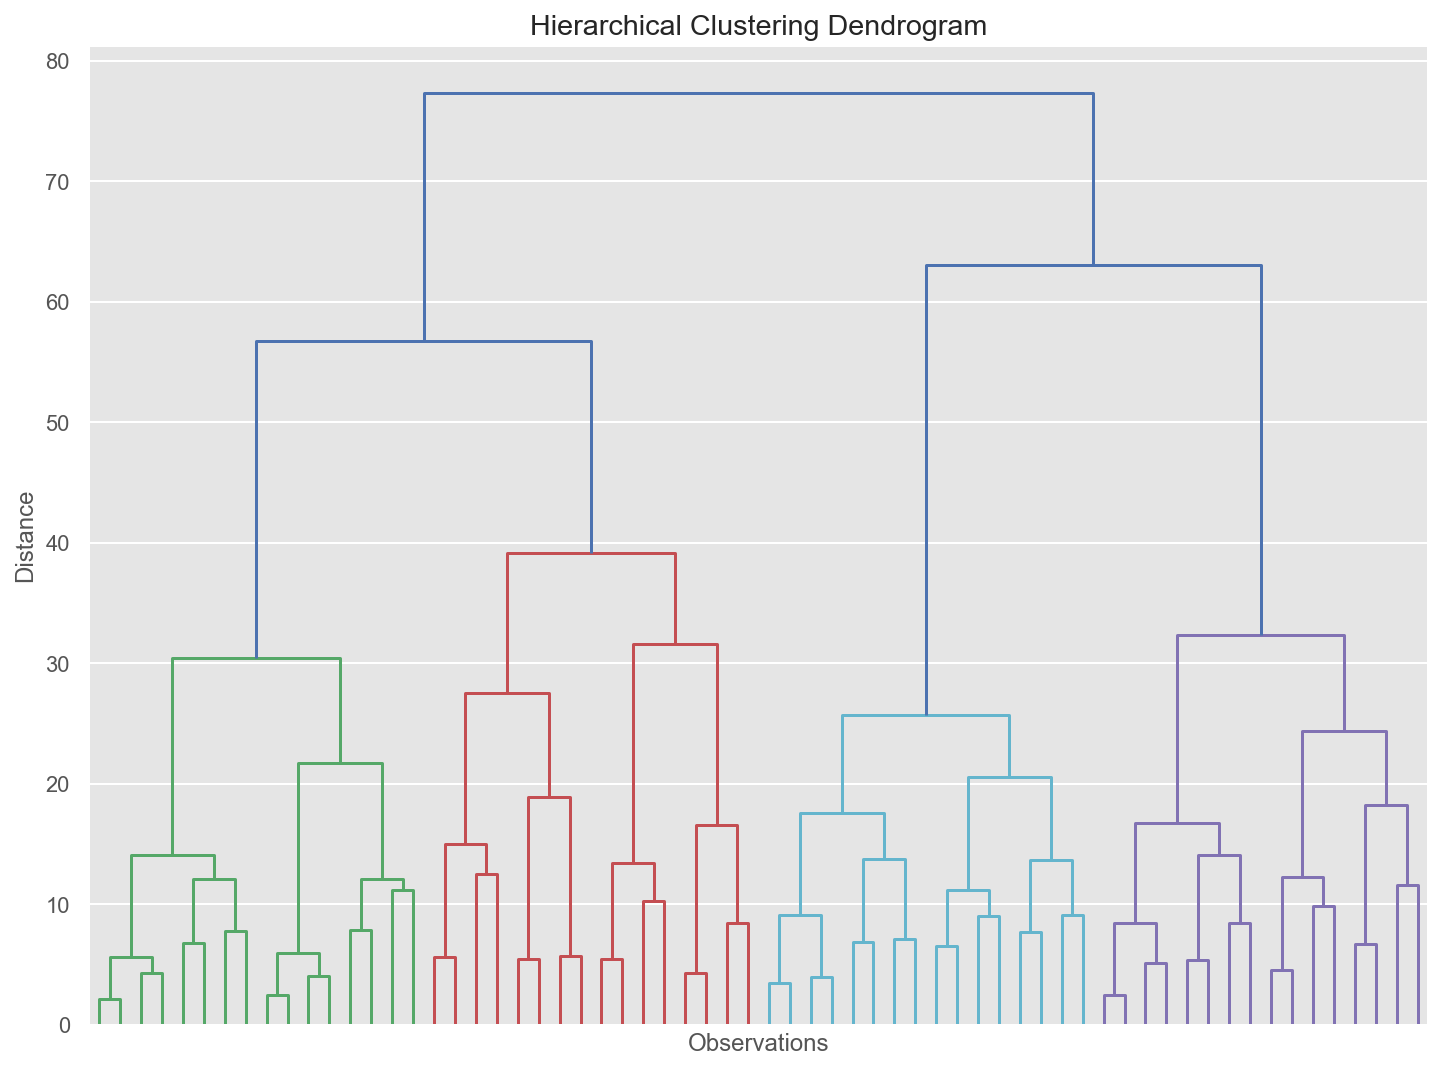

In [17]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True)
plt.show()

In [19]:
"""
Note: Look at left cluster right blue vertical line.
This is the longest vertical line that no other horizontal lines crosses. So we take clusters below it and color them different.

We see four clusters.
""";

## KMeans Clustering

In [21]:
from sklearn.cluster import KMeans

### Find number of cluster using elbow method

In [22]:
# within cluster sum of squares
# kmeans++ first runs and finds best random seed.
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    random_state=SEED)

    kmeans.fit(dfs_std)
    wcss.append(kmeans.inertia_)

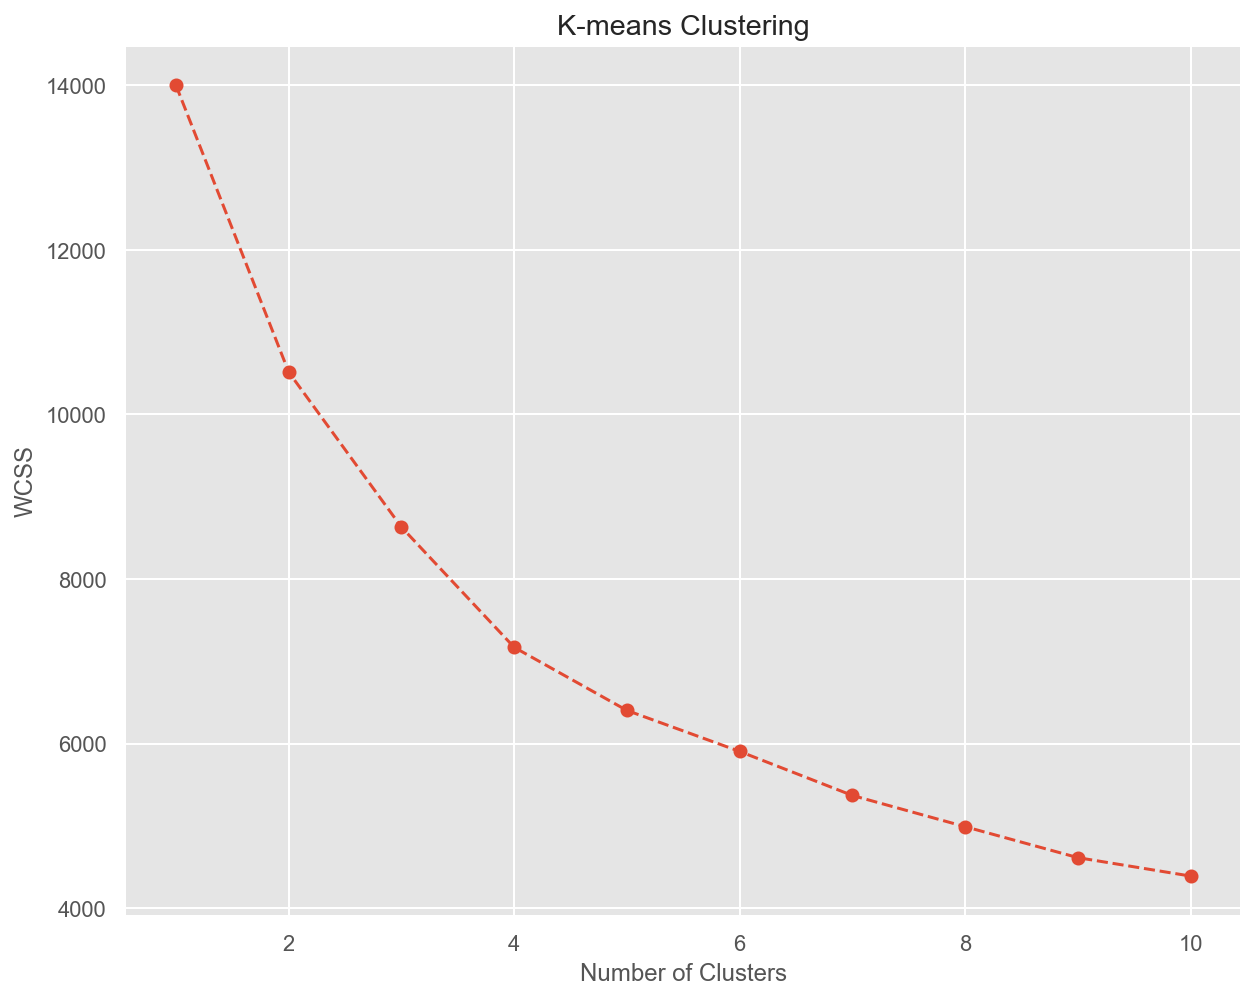

In [23]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

### After finding number of clusters fit the method

In [24]:
# using elbow method, I can see plot flattens from cluster=4

In [25]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(dfs_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

### Analysis of Clusters

In [ ]:
df_segm_kmeans = dfs.copy()

In [26]:
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [27]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


In [29]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()

df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [30]:
df_segm_analysis.rename({0:'well-off',
                         1:'fewer-opportunities',
                         2:'standard',
                         3:'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
career focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [32]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means']\
.map({0:'well-off', 
     1:'fewer opportunities',                                            2:'standard',
     3:'career focused'
     })

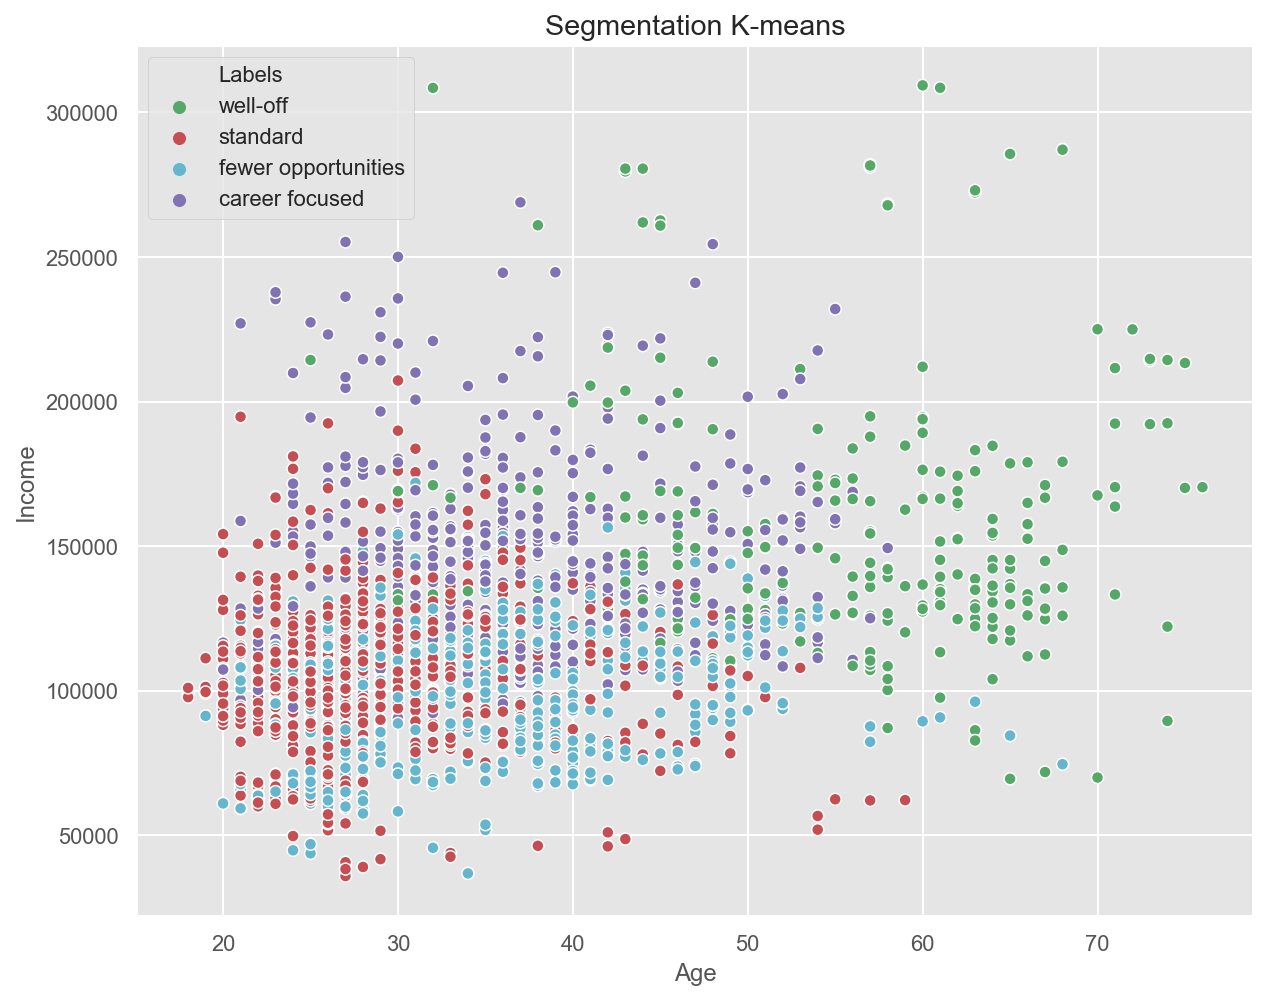

In [33]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

In [34]:
# we dont see much separated clusters.
# so, we will do pca and plot again.

## Dimension Reduction using PCA

In [35]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA()
pca.fit(dfs_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [40]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumulative Explained Variance')

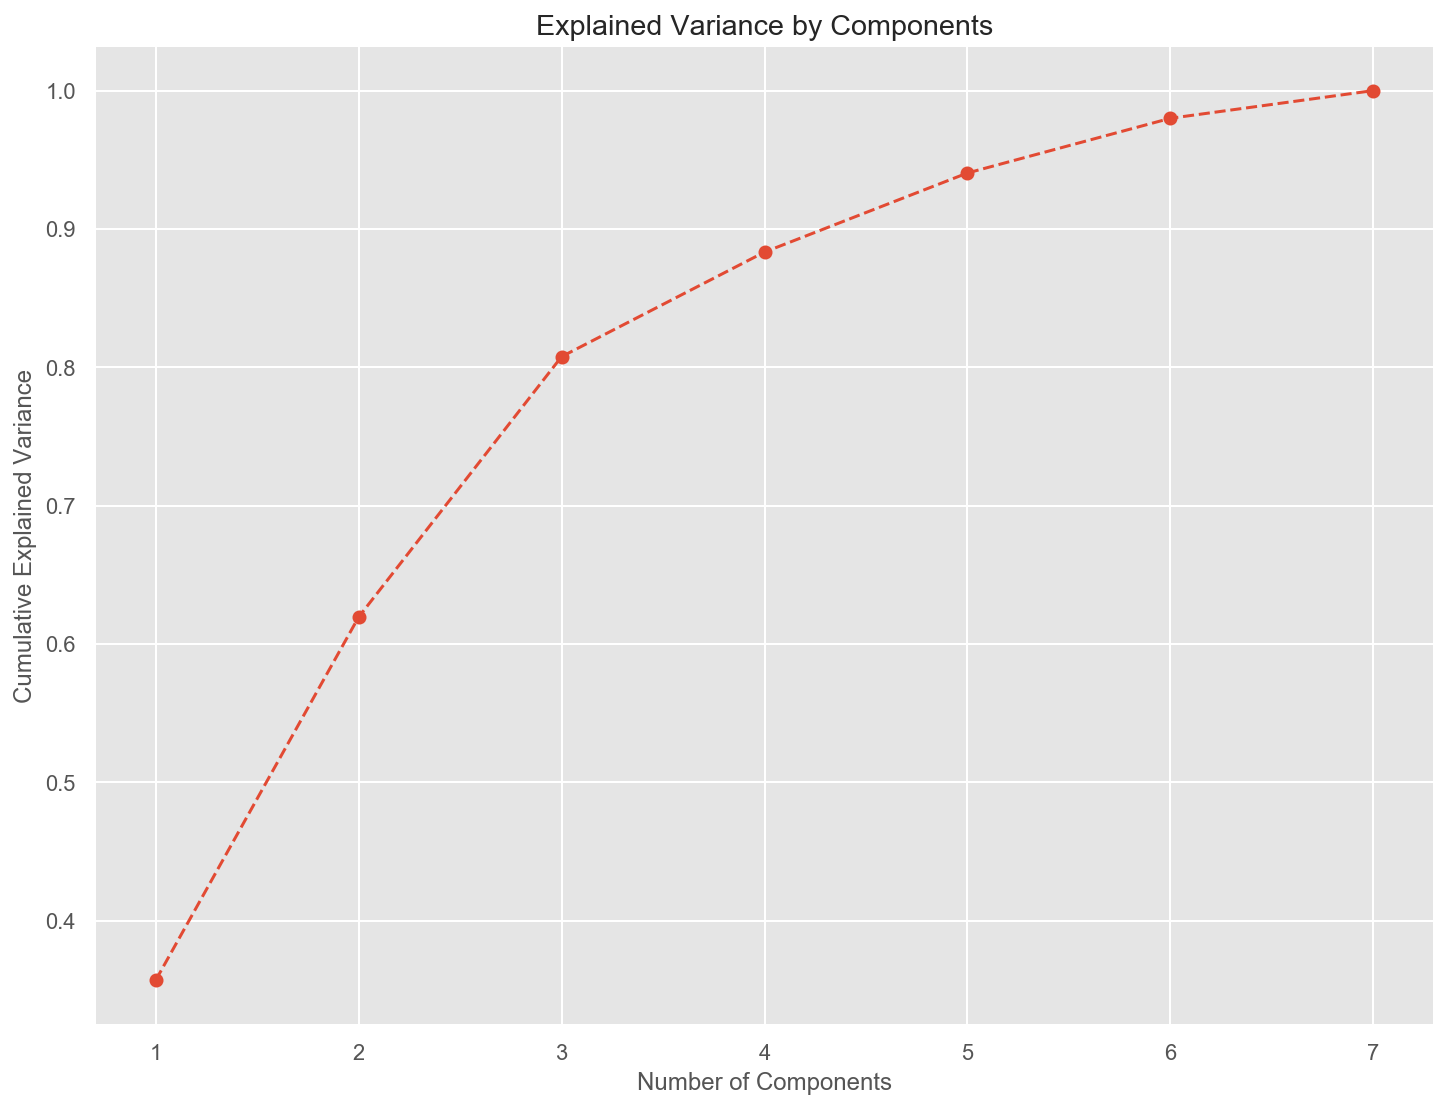

In [41]:
plt.figure(figsize = (12,9))

plt.plot(range(1,8),
         pca.explained_variance_ratio_.cumsum(),
         marker = 'o',
         linestyle = '--')

plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [42]:
# lets choose 90% of data be explained. choose n_components=4

In [60]:
n_components = 4
pca = PCA(n_components=n_components)
pca.fit(dfs_std)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [46]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503],
       [-0.31560091,  0.28045392, -0.00950602,  0.18147643, -0.48260023,
        -0.28169039,  0.69026455]])

In [62]:
components = [f'Component {i}' for i in range(1,n_components+1)]
df_pca_comp = pd.DataFrame(data = pca.components_,
    columns = dfs.columns.values,
    index = components)
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685
Component 4,-0.315601,0.280454,-0.009506,0.181476,-0.482600,-0.281690,0.690265


([<matplotlib.axis.YTick at 0x13411ee48>,
 <a list of 4 Text yticklabel objects>)

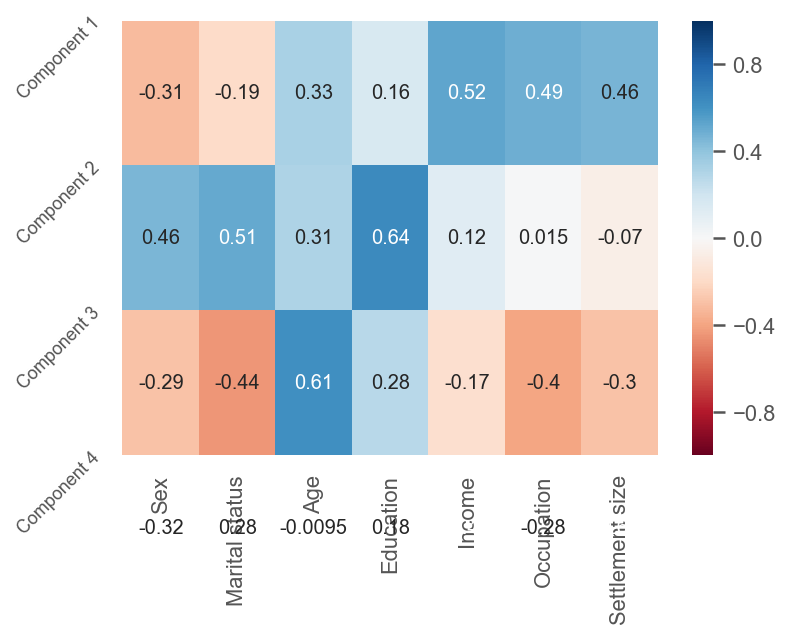

In [63]:
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2,3], 
           components,
           rotation = 45,
           fontsize = 9)

## KMeans Clustering using PCA

In [52]:
scores_pca = pca.transform(dfs_std)

In [53]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = SEED)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

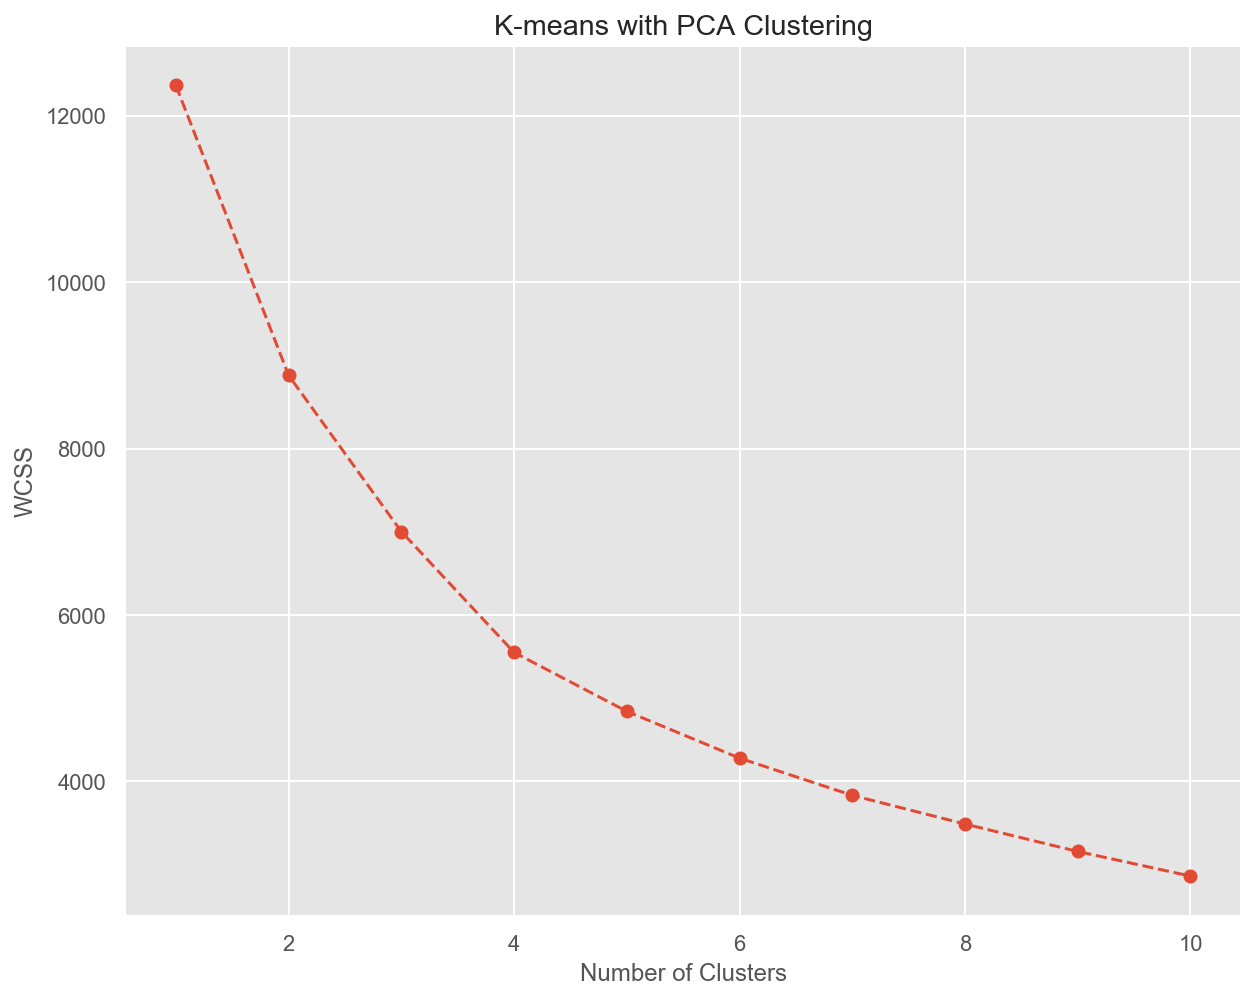

In [54]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [64]:
# from elbow choose the n_clusters
n_clusters = 4
kmeans_pca = KMeans(n_clusters=n_clusters,
                    init='k-means++',
                    random_state=SEED)

In [66]:
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

### K-means clustering with PCA Results

In [68]:
df_segm_pca_kmeans = pd.concat([dfs.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)

df_segm_pca_kmeans.columns.values[-n_components: ] = components

df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

df_segm_pca_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Component 4,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,1.217794,2
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0.548385,3
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0.120675,0
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,-0.510753,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,-0.231808,1


In [69]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans\
.groupby(['Segment K-means PCA']).mean()

df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Component 4
Segment K-means PCA,,,,,,,,,,,
0,0.319018,0.089980,35.259714,0.768916,95850.155419,0.296524,0.038855,-0.987777,-0.882022,0.965476,-0.271684
1,0.026178,0.178010,35.624782,0.734729,140950.319372,1.267016,1.520070,1.381089,-1.044848,-0.273292,0.211736
2,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,0.093869
3,0.905045,0.986647,28.873887,1.063798,107576.228487,0.672107,0.439169,-1.122432,0.733291,-0.797918,-0.019662


In [72]:
mapping_cluster = {
    0:'standard', 
    1:'career focused',
    2:'fewer opportunities', 
    3:'well-off'}

df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()

df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()

df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq\
.rename(mapping_cluster)

df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Component 4,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,,
standard,0.319018,0.089980,35.259714,0.768916,95850.155419,0.296524,0.038855,-0.987777,-0.882022,0.965476,-0.271684,NaN,NaN
career focused,0.026178,0.178010,35.624782,0.734729,140950.319372,1.267016,1.520070,1.381089,-1.044848,-0.273292,0.211736,NaN,NaN
fewer opportunities,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,0.093869,NaN,NaN
well-off,0.905045,0.986647,28.873887,1.063798,107576.228487,0.672107,0.439169,-1.122432,0.733291,-0.797918,-0.019662,NaN,NaN


In [73]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans[
    'Segment K-means PCA'].map(mapping_cluster)

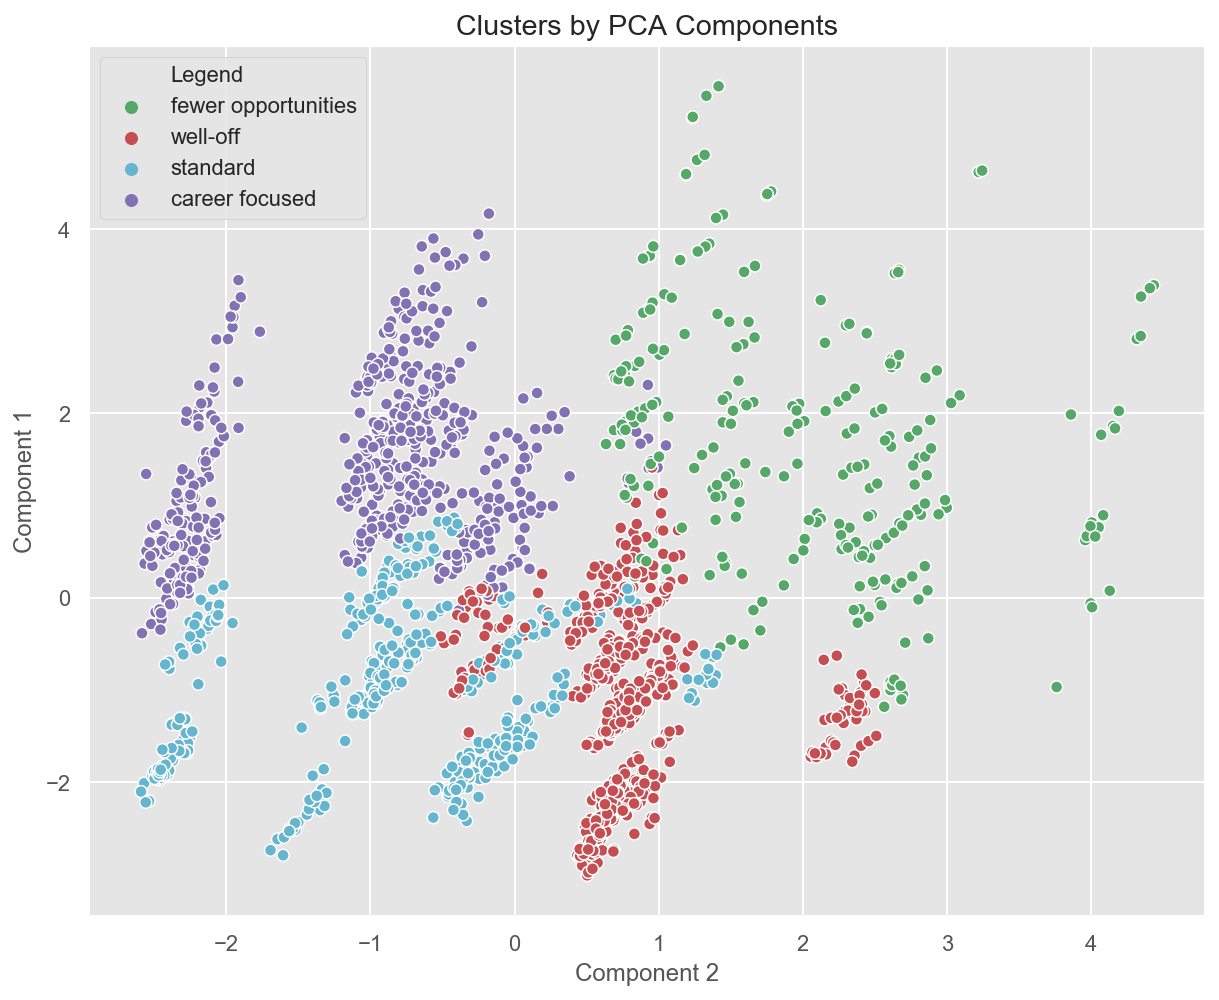

In [74]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

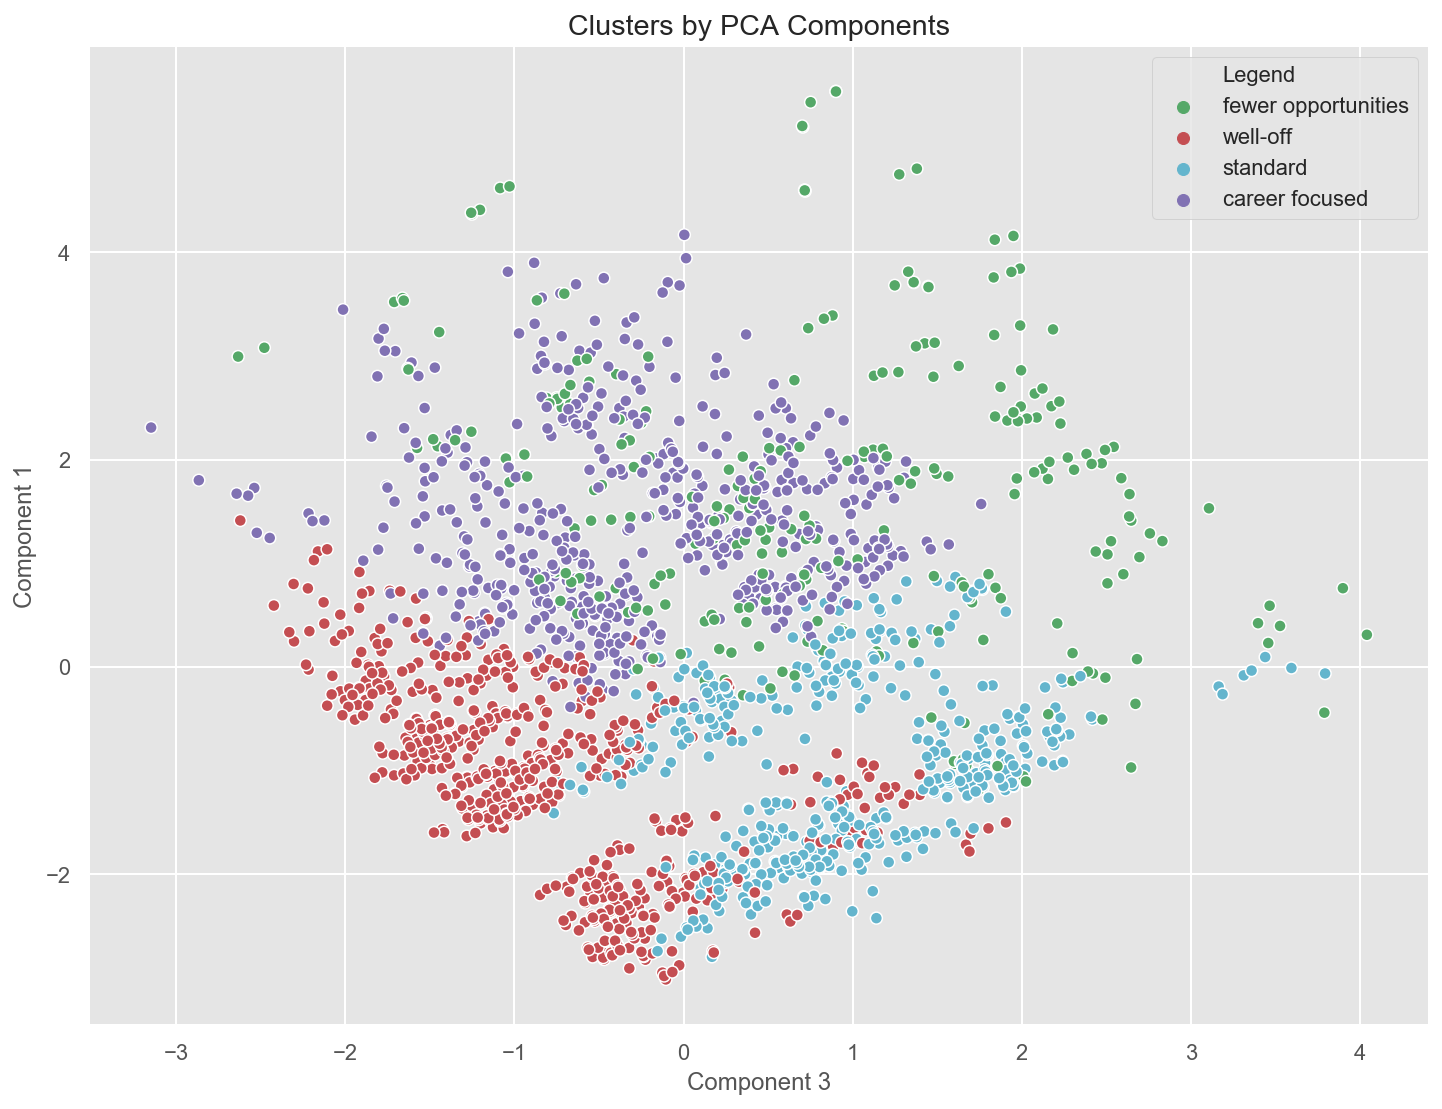

In [75]:
x_axis_1 = df_segm_pca_kmeans['Component 3']
y_axis_1 = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (12, 9))
sns.scatterplot(x_axis_1, y_axis_1, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components' )
plt.show()

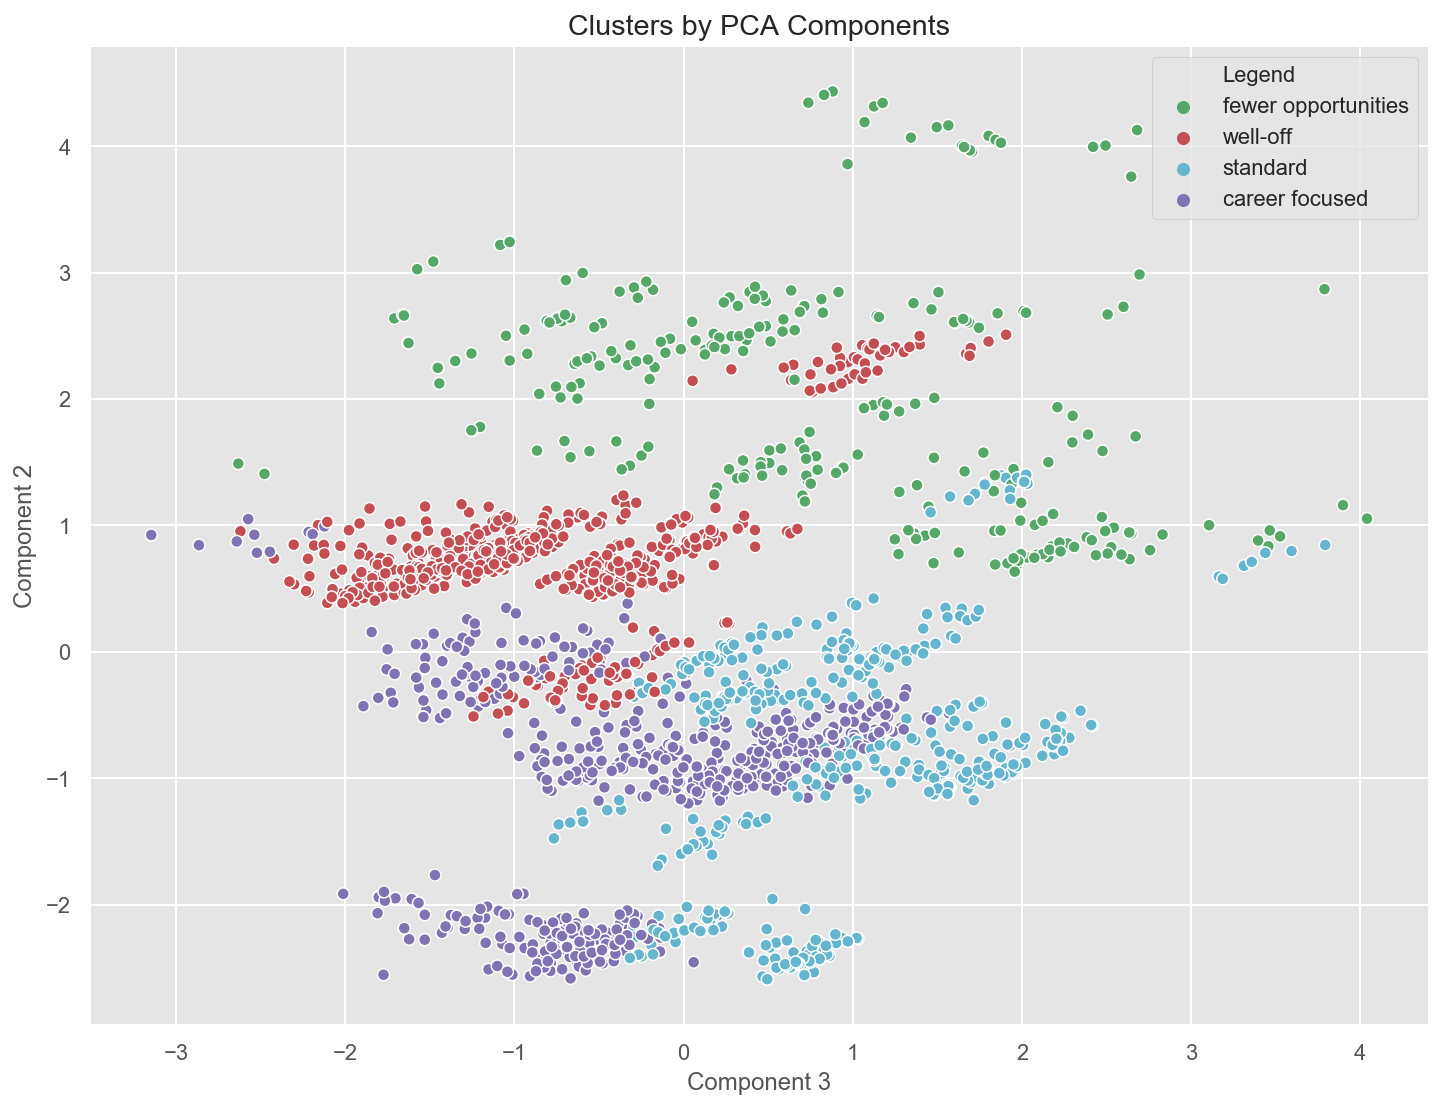

In [76]:
x_axis_1 = df_segm_pca_kmeans['Component 3']
y_axis_1 = df_segm_pca_kmeans['Component 2']
plt.figure(figsize = (12, 9))
sns.scatterplot(x_axis_1, y_axis_1, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components' )
plt.show()

# Pickle the Models

In [77]:
import pickle

In [79]:
pickle.dump(scaler, open('scaler.pickle','wb'))
pickle.dump(pca,open('pca.pickle','wb'))
pickle.dump(kmeans_pca, open('kmeans_pca.pickle','wb'))